# 🧠 Customer Segmentation using Machine Learning

## 👨‍💻 Author
**Syed Muhammad Ali**  
📧 [Muhammadshah36912@gmail.com](mailto:Muhammadshah36912@gmail.com)  
🔗 [LinkedIn Profile](https://www.linkedin.com/in/muhammad-ali-64613838b/)  
💻 [GitHub Repository](https://github.com/muhammad102331-hash)

---

## 📋 Project Overview
Customer segmentation is a crucial step in understanding diverse customer behaviors and designing personalized marketing strategies.  
This project applies **machine learning techniques** to segment customers based on their purchasing patterns and demographic attributes.

By analyzing customer data, the model identifies distinct groups with similar characteristics, enabling businesses to:
- Improve **targeted marketing**
- Enhance **customer retention**
- Increase **overall profitability**

---

## 🧩 Key Objectives
- Apply **unsupervised learning algorithms** such as *K-Means*, *DBSCAN*, and *Hierarchical Clustering*  
- Visualize clusters using **PCA (Principal Component Analysis)**  
- Derive actionable insights for business decision-making  

---

## 🧰 Technologies Used
- **Python**
- **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**
- **Scikit-learn**
- **Jupyter Notebook / Google Colab**

---

## 📊 Expected Outcomes
- Identification of customer groups with distinct purchasing behaviors  
- Clear visualization of customer segments  
- Insightful recommendations for marketing teams  




In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('customer_segmentation.csv')

In [49]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [50]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [51]:
df.shape

(2240, 29)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [53]:
df.isna().sum().sum()

np.int64(24)

In [54]:
df.dropna(inplace=True)

In [55]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [56]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [57]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [58]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [60]:
df['Age'] = 2025 - df['Year_Birth']

In [61]:
df['Age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [62]:
df.head()  # Display the first few rows of the DataFrame

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [63]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [64]:
df['Total_Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [65]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [66]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [67]:
df['Total_spending'] = df[spend_cols].sum(axis=1)

In [68]:
df['Total_spending']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_spending, Length: 2216, dtype: int64

In [69]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_spending'],
      dtype='object')

In [70]:
df['customer_since'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days

In [71]:
df['customer_since']

0       4813
1       4263
2       4462
3       4289
4       4311
        ... 
2235    4531
2236    4169
2237    4305
2238    4306
2239    4772
Name: customer_since, Length: 2216, dtype: int64

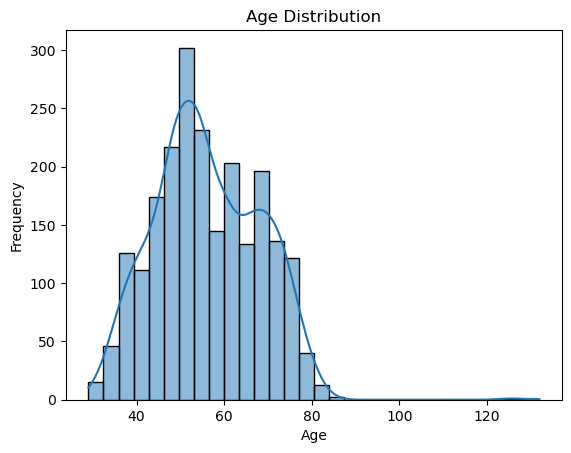

In [72]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

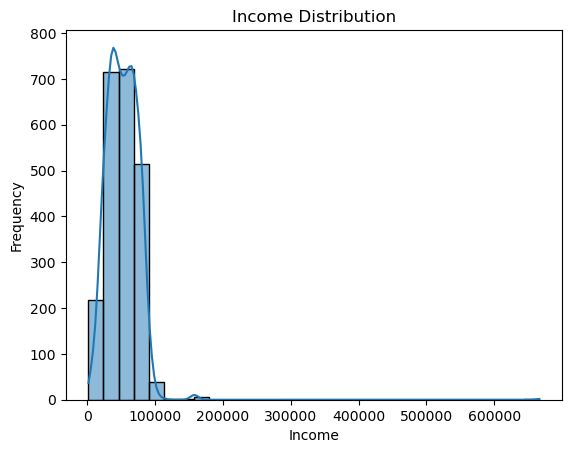

In [73]:
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

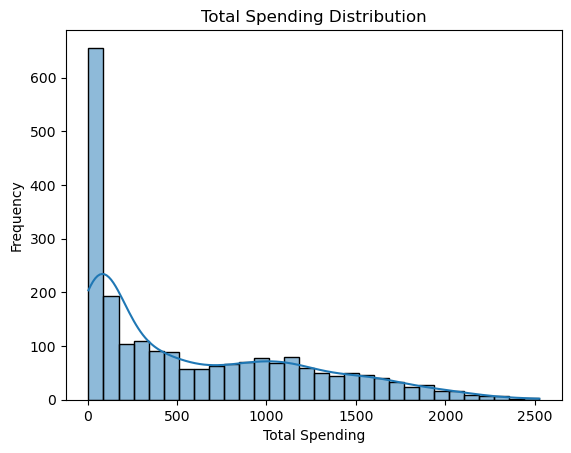

In [74]:
sns.histplot(df['Total_spending'], bins=30, kde=True)
plt.title('Total Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

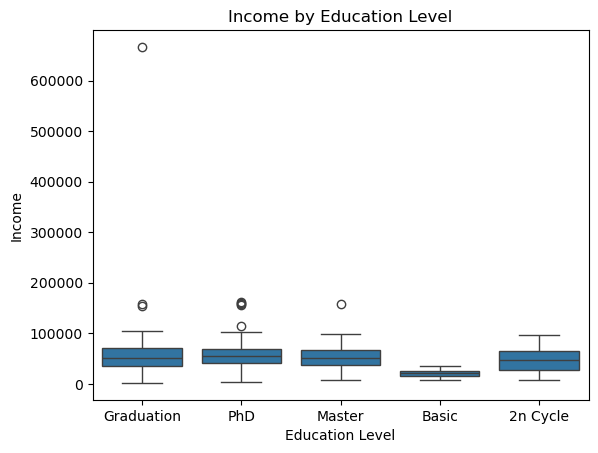

In [75]:
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

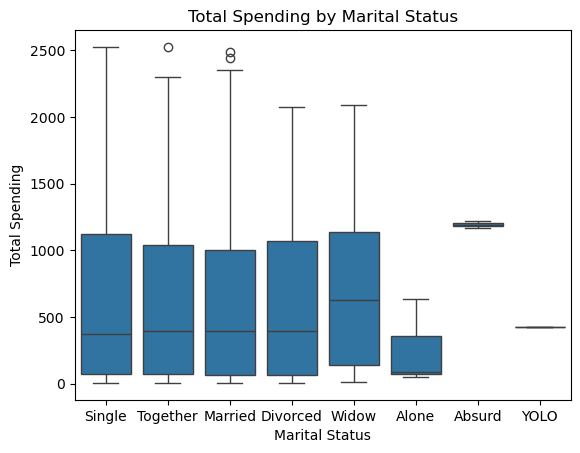

In [76]:
sns.boxplot(x='Marital_Status', y='Total_spending', data=df)
plt.title('Total Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.show()

In [77]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_spending', 'customer_since'],
      dtype='object')

In [78]:
corr = df[['Income', 'Age','Recency','Total_spending','NumWebPurchases','NumStorePurchases']].corr()

In [79]:
corr

,Income,Age,Recency,Total_spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


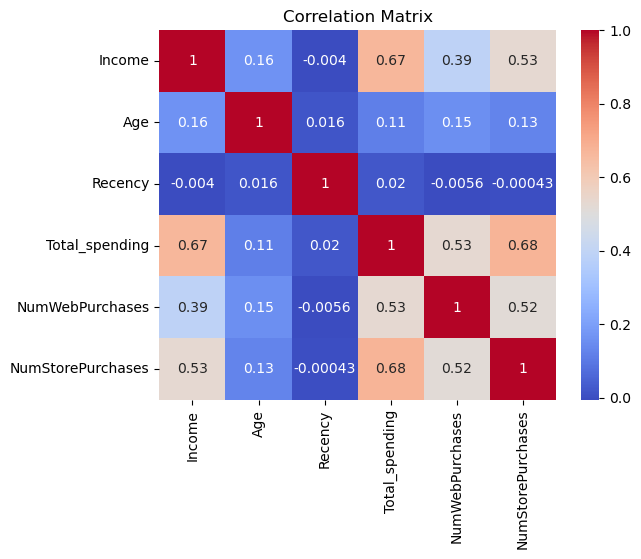

In [80]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [81]:
pivot_income = df.pivot_table(values='Income', index='Education', columns='Marital_Status', aggfunc='mean')
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


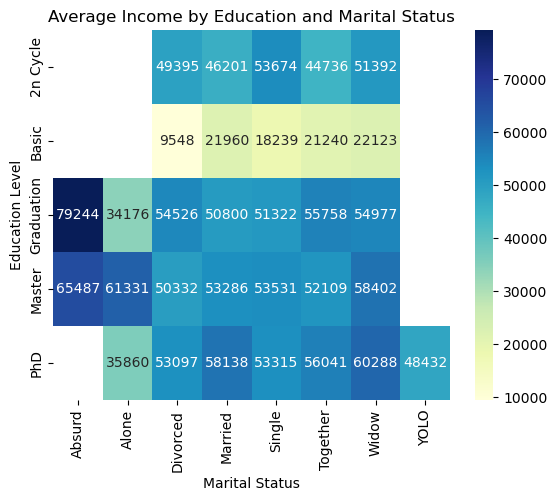

In [82]:
sns.heatmap(pivot_income, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Income by Education and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Education Level')
plt.show()

In [83]:
group1 = df.groupby('Education')['Total_spending'].mean().sort_values(ascending=False)

In [84]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_spending, dtype: float64

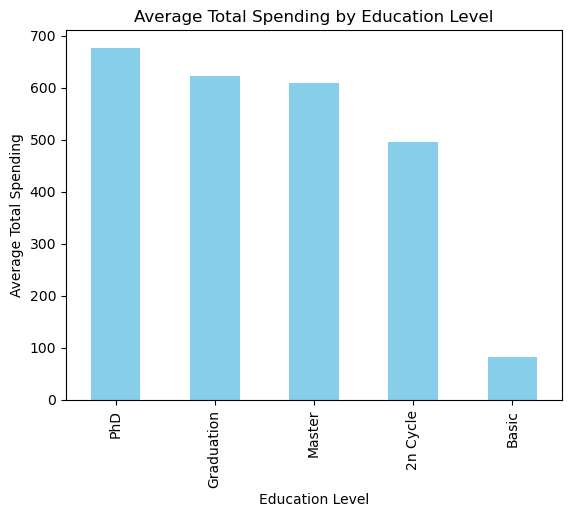

In [40]:
group1.plot(kind='bar', color='skyblue')
plt.title('Average Total Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Total Spending')
plt.show()

In [41]:
df['AcceptedAny'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


In [42]:
df['AcceptedAny'].unique()

array([0, 1, 2, 3, 4])

In [43]:
df['AcceptedAny'] = df['AcceptedAny'].apply(lambda x: 1 if x > 0 else 0)

In [44]:
group2 = df.groupby('Marital_Status')['AcceptedAny'].mean().sort_values(ascending=False)
group2

Marital_Status
Absurd      0.500000
Alone       0.333333
Widow       0.236842
Married     0.211202
Single      0.205945
Together    0.200698
Divorced    0.198276
YOLO        0.000000
Name: AcceptedAny, dtype: float64

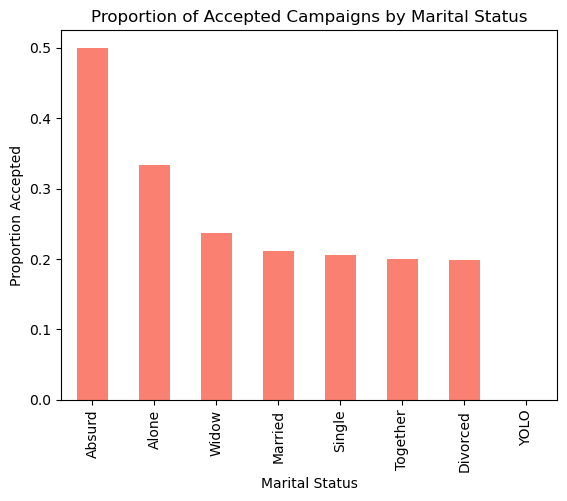

In [85]:
group2.plot(kind='bar', color='salmon')
plt.title('Proportion of Accepted Campaigns by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion Accepted')
plt.show()

In [86]:
bins = [18, 30, 40, 50, 60, 70, 90]

In [87]:
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [88]:
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [89]:
df['Age_Group']

0       60-69
1         70+
2       60-69
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: Age_Group, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [90]:
group3 = df.groupby('Age_Group')['Income'].mean()

C:\Users\Prince\AppData\Local\Temp\ipykernel_13440\3091144797.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby('Age_Group')['Income'].mean()


In [91]:
group3

Age_Group
18-29    10960.500000
30-39    47905.475676
40-49    48057.587649
50-59    50479.321534
60-69    55980.030928
70+      58767.083102
Name: Income, dtype: float64

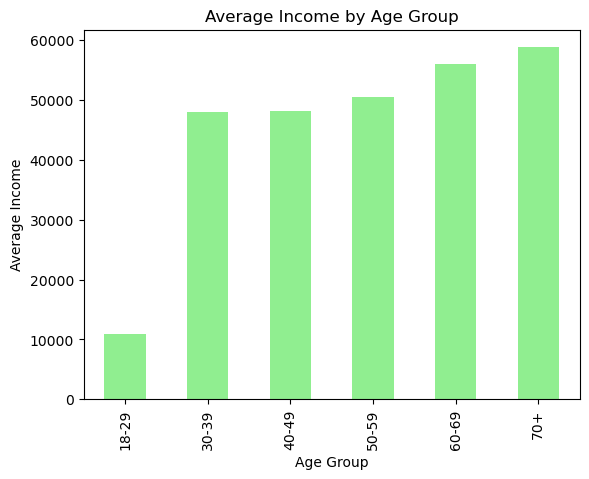

In [92]:
group3.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.show()

In [93]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_spending,customer_since,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,68,0,1617,4813,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,71,2,27,4263,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,60,0,776,4462,60-69
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,41,1,53,4289,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,44,1,422,4311,40-49


In [94]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_spending', 'customer_since',
       'Age_Group'],
      dtype='object')

In [ ]:
Age - Income - Total_spending - NumWebPurchases - NumStorePurchases - NumwebsiteVisitsMonth - Recency

In [100]:
features = [
    'Age',
    'Income',
    'Total_spending',
    'NumWebPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Recency'
]


In [101]:
x = df[features].copy()

In [102]:
x

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


In [ ]:
fromklearn.preprocessing import StandardScaler
scaler = Sta sndardScaler()


In [106]:
x_scaled = scaler.fit_transform(x)

In [107]:
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [108]:
from sklearn.cluster import KMeans

In [109]:
wcss = []

In [111]:
from sklearn.cluster import KMeans

wcss = []  # to store within-cluster sum of squares

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)


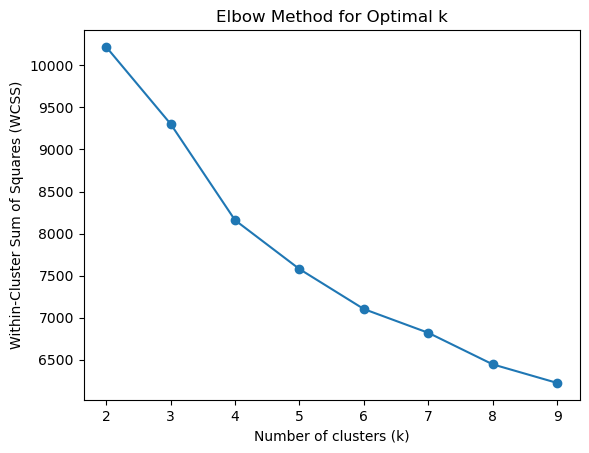

In [112]:
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [113]:
kmeans = KMeans(n_clusters=6)
df['Cluster'] = kmeans.fit_predict(x_scaled)

In [114]:
df['Cluster']

0       1
1       5
2       1
3       3
4       0
       ..
2235    1
2236    1
2237    4
2238    2
2239    5
Name: Cluster, Length: 2216, dtype: int32

In [115]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_spending,customer_since,Age_Group,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4813,60-69,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4263,70+,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4462,60-69,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4289,40-49,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4311,40-49,0


In [116]:
Cluster_summary = df.groupby('Cluster')[features].mean()

In [117]:
Cluster_summary

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,51.498834,34171.342657,129.041958,2.391608,3.331002,6.818182,77.638695
1,59.473282,59567.208651,897.737913,8.091603,7.781170,6.511450,46.732824
2,53.600000,78232.126984,1270.415873,4.853968,8.774603,2.758730,23.565079
3,48.131222,32044.834842,104.029412,2.138009,3.151584,6.714932,25.619910
4,59.860335,73329.536313,1206.178771,4.553073,8.441341,2.759777,75.114525
5,69.677419,45346.161290,211.953405,2.663082,4.261649,5.297491,40.505376


In [118]:
df['Cluster'].value_counts()

Cluster
3    442
0    429
1    393
4    358
2    315
5    279
Name: count, dtype: int64

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x_scaled)
df['PCA1'], df['PCA2'] = pca_data[:, 0], pca_data[:, 1]

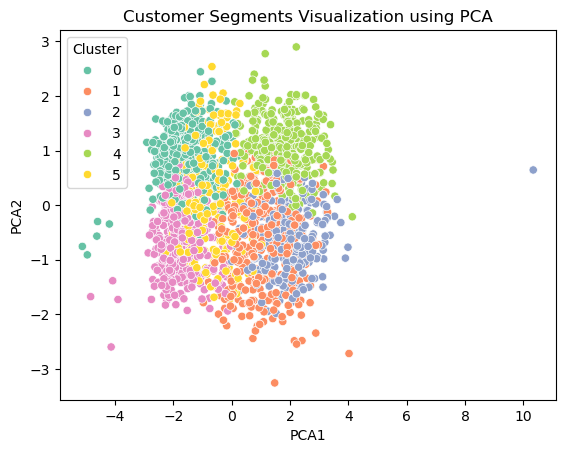

In [120]:
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments Visualization using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [121]:
Cluster_summary

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,51.498834,34171.342657,129.041958,2.391608,3.331002,6.818182,77.638695
1,59.473282,59567.208651,897.737913,8.091603,7.781170,6.511450,46.732824
2,53.600000,78232.126984,1270.415873,4.853968,8.774603,2.758730,23.565079
3,48.131222,32044.834842,104.029412,2.138009,3.151584,6.714932,25.619910
4,59.860335,73329.536313,1206.178771,4.553073,8.441341,2.759777,75.114525
5,69.677419,45346.161290,211.953405,2.663082,4.261649,5.297491,40.505376


In [ ]:
cluster 0 high income, high spending -> premium customers
cluster 2 high web purchases, moderate income -> loyal online shoppers
cluster 5 low income, low spending -> Dormat customers
